In [131]:
# Import and initialize Matlab's Python API because lab1 is Matlab-specific.
# NOTE: this takes a while (also I/O blocking)
import matlab.engine
eng = matlab.engine.start_matlab()

In [132]:
# Load python dependencies
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [133]:
# Redirect Matlab stdout and stderr to buffers

import io
out = io.StringIO()
err = io.StringIO()

def clean_buffers(out, err):
    out.seek(0)
    out.truncate(0)
    
    err.seek(0)
    err.truncate(0)

1. Image Classes

1(a) Load a truecolor image of your choice into a matrix I into Matlab
% using imread.

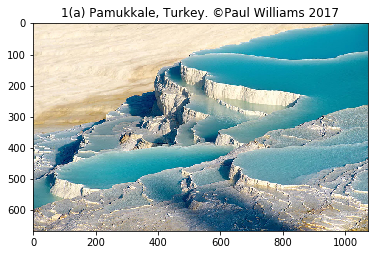

1(a) class of I is uint8
1(a) size of I is [536 858 3]
1(a) the number of bands of I is 3
1(a) min of I is 0
1(a) max of I is 255


In [134]:
eng.eval('I = imread(\'pamukkale.jpg\');', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(I); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('1a_pamukkale.bmp')
plt.imshow(img)
plt.title('1(a) Pamukkale, Turkey. ©Paul Williams 2017')
plt.show()

# What's the image's class?
clean_buffers(out, err)
eng.eval('fprintf(\'1(a) class of I is %s\\n\', class(I));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

# What's its size?
clean_buffers(out, err)
eng.eval('fprintf(\'1(a) size of I is %s\\n\', mat2str(size(I)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())


# How many bands does it have?
clean_buffers(out, err)
eng.eval('fprintf(\'1(a) the number of bands of I is %d\\n\', size(I, 3));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())


# Find its minimum and maximum values using
clean_buffers(out, err)
eng.eval('fprintf(\'1(a) min of I is %d\\n\', min(I(:)));', nargout=0, stdout=out, stderr=err)
eng.eval('fprintf(\'1(a) max of I is %d\\n\', max(I(:)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())


1(b)

Convert the image into a 64-bit floating-point number array using the command

In [143]:
clean_buffers(out, err)
eng.eval('D = double(I);', nargout=0, stdout=out, stderr=err)

# and check its class.
clean_buffers(out, err)
eng.eval('fprintf(\'1(b) class of D is %s\\n\', class(D));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

# Find the maximum and minimum values of D.
clean_buffers(out, err)
eng.eval('fprintf(\'1(b) min o D is %d\\n\', min(D(:)));', nargout=0, stdout=out, stderr=err)
eng.eval('fprintf(\'1(b) max of D is %d\\n\', max(D(:)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

1(b) class of D is double
1(b) min o D is 0
1(b) max of D is 255


1(c)

Now display D using

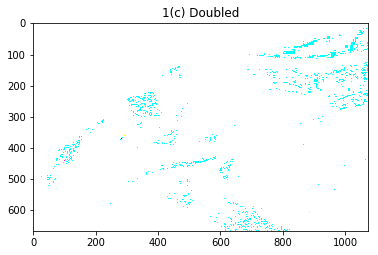

In [144]:
eng.eval('figure; image(D); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('1c_doubled.bmp')
plt.imshow(img)
plt.title('1(c) Doubled')
plt.show()

1(c) 

What happens? Read the Matlab help pages on images as necessary to
understand what's going on.

#### Answer: The image appears almost all white with some cyan. Behind the scenes, when the image class is double, Matlab only accepts float values between 0 and 1. Any - in this case almost all - values above 1.0 are set to 1. The reason that the image displayed have mostly cyan is that in those pixel locations, the red values were 0 to start with, while the blue and green were over 1 and thus set to 1. Everywhere else, the values have been set to (1, 1, 1) thus appearing white.

1(c)

What arithmetic operation must you perform on
D to make it displayable with image(D)? That is, replace D with an
arithmetically altered version of D - i.e. D = f(D) where f() s some
arithmetic operation like multiplicatin or division by a constant. te
that as you experiment with this, if you replace D with the wrong thing, you will have to execute D = double(I); to get it back.

#### Answer: D = D/255

In [145]:
eng.eval('D = D/255;', nargout=0, stdout=out, stderr=err)

In [146]:
# Find the maximum and minimum values of your altered D.
clean_buffers(out, err)
eng.eval('fprintf(\'1(c) min o corrected D is %d\\n\', min(D(:)));', nargout=0, stdout=out, stderr=err)
eng.eval('fprintf(\'1(c) max of corrected D is %d\\n\', max(D(:)));', nargout=0, stdout=out, stderr=err)
eng.eval('fprintf(\'1(c) class of corrected D is %s\\n\', class(D));', nargout=0, stdout=out, stderr=err)
eng.eval('fprintf(\'1(c) size of corrected D is %s\\n\', mat2str(size(D)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())


1(c) min o corrected D is 0
1(c) max of corrected D is 1
1(c) class of corrected D is double
1(c) size of corrected D is [536 858 3]


1(d)

Once you are able to run

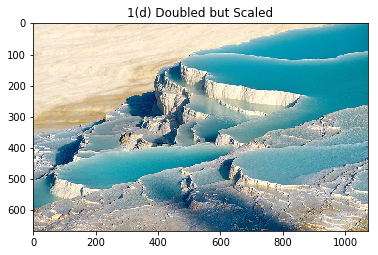

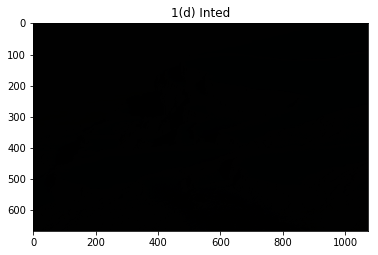

In [151]:
eng.eval('figure; image(D); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('1d_doubled_scaled.bmp')
plt.imshow(img)
plt.title('1(d) Doubled but Scaled')
plt.show()

# and get an image that looks correct, convert D back to 8 bits per pixel by entering
eng.eval('U8 = uint8(D);', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(U8); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('1d_inted.bmp')
plt.figure()
plt.imshow(img)
plt.title('1(d) Inted')
plt.show()

What do you see?

#### Answer: The displayed image seems all black.

1(d) Find the maximum and minimum values of U8.

In [152]:
clean_buffers(out, err)
eng.eval('fprintf(\'1(d) min of U8 is %d\\n\', min(U8(:)));', nargout=0, stdout=out, stderr=err)
eng.eval('fprintf(\'1(d) max of U8 is %d\\n\', max(U8(:)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

1(d) min of U8 is 0
1(d) max of U8 is 1


1(d) What has the conversion done?

#### Answer: The conversion rounded the floats between 0 and 1 to integers 0 and 1. The image remains 8-bit (with 3 bands) so Matlab treats it as if it were still a color image with a range of (integers) [0, 255]. However, 1 looks similar to 0 so that the image looks all black though it isn't.


1(d) Now do this:

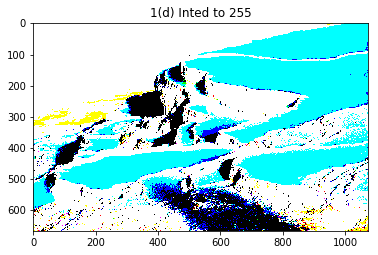

In [154]:
eng.eval('figure; image(U8*255); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('1d_inted_255.bmp')
plt.figure()
plt.imshow(img)
plt.title('1(d) Inted to 255')
plt.show()

1(d)

What if any colors do you see?

#### Answer: Blue, green, red, yellow, cyan, magenta, white, black.

Why would a binary image have more colors than just black and white?

#### Answer: Different combinations (2^3 = 8) of 0s and 255s in three color locations can still produce RGB and their basic combinations (cyan, magenta, yellow), plus white and black.


1(e)

In your own words, write out a short explanation of the differences between images of class uint8 and double.

#### Answer: double images are more accomodating in representating uint8 and uint16, etc. Each pixel location needs to have a float value between 0 and 1. In contrast, uint8 images are specific and have integer values between 0 and 255.


Explain what it takes to convert between the formats without losing the intensities in the images.

#### Answer: In order to convert uint8 intensity images to double, the integers first need to be converted to double. Then they need to be scaled by the max value (255). In reverse, double images need to be scaled up and then rounded to [0, 255].

2. Loading, displaying, and saving color mapped (aka indexed) images.

2(a) Load chweel_mapped.gif and its color map into a matrix in Matlab.

In [155]:
eng.eval('[gif cmap_gif] = imread(\'cwheel_mapped.gif\');', nargout=0, stdout=out, stderr=err)

2(a) Use the class function to determine the type of the image

In [156]:
clean_buffers(out, err)
eng.eval('fprintf(\'2(a) class of gif is %s\\n\', class(gif));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

2(a) class of gif is uint8


2(a) Use size to determine its dimensions

In [157]:
clean_buffers(out, err)
eng.eval('fprintf(\'2(a) size of gif is %s\\n\', mat2str(size(gif)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

2(a) size of gif is [600 800]


2(a)

Also, note the file size in bytes of cwheel_mapped.gif. How does this compare to the dimensions and file size of cwheel.bmp Answer: bmp is 1.4MB, but git is 137KB.

imread returns two data structures. The first one is a matrix containing the image. The second is the image?s color map. Think of the color map as a palette of colors arranged in a N ï¿½ 3 table, where N is the number of colors. The value at a pixel in the image is not an intensity, but an index into the color map ? the number of the row that contains the color vector for that pixel.

How many colors are in the palette for cwheel_mapped.gif? Note: Typically all x-bit images have 256 colors.

In [158]:
clean_buffers(out, err)
eng.eval('fprintf(\'2(a) There are %d colors in the palette for cwheel_mapped.gif\\n\', size(cmap_gif, 1));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

2(a) There are 256 colors in the palette for cwheel_mapped.gif


2(b)

Use

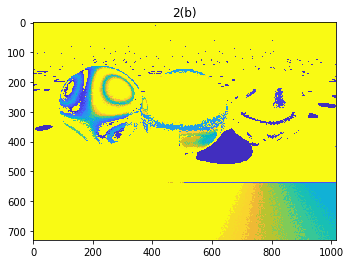

In [160]:
eng.eval('figure; image(gif); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('2b_gif_yellow.bmp')
plt.imshow(img)
plt.title('2(b)')
plt.show()

2(b)

What do you see? Describe its appearance.
#### Answer: Answer: It's desplayed incorrectly - mostly yellow and blue.

Now use the command to associate with the new figure the color map loaded along with cwheel_mapped.gif.

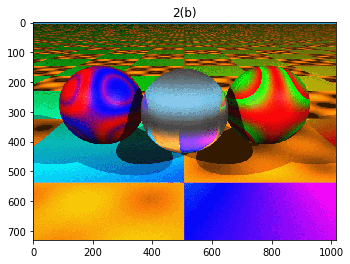

In [161]:
eng.eval('colormap(cmap_gif); title(\'gif\');', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', stdout=out, stderr=err)
img = mpimg.imread('2b_gif_color.bmp')
plt.imshow(img)
plt.title('2(b)')
plt.show()

2(b)

Now what do you see? How does it compare to the first figure you generated in part 2a? 

#### Answer: The image is displayed correctly using the colormap compared to the gif.

2(c)

Create a new color map, say cmap2, from the old one, cmap, as follows

In [162]:
eng.eval('temp = mean(cmap_gif,2);', nargout=0, stdout=out, stderr=err)
eng.eval('cmap2 = [temp temp temp];', nargout=0, stdout=out, stderr=err)

2(c)

What did this just do?

#### Answer: The first step took the mean among the 3 bands of each color in the palette of the image and constructed another palette setting 3 bands to the average color intensity of the original palette. If the three bands are the same, it's just grey by definition.

2(c)

Select the figure that displays cwheel_mapped.gif to which you did not did not apply a color map, and apply the new color map using

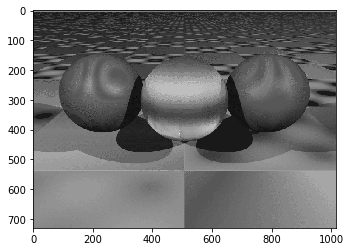

In [163]:
eng.eval('colormap(cmap2);', nargout=0, stdout=out, stderr=err)
img = mpimg.imread('2b_gif_grey.bmp')
plt.imshow(img)
plt.show()

Now what do you see?

#### Answer: The gif has been converted to grayscale.

2(d)

Now you are going to compare the 24-bit image, cwheel.bmp, with its color mapped version, cwheel_mapped.gif, displayed with its original color map ? the one you loaded along with the image in part 2a.

In [164]:
eng.eval('[bmp cmap_bmp] = imread(\'cwheel.bmp\');', nargout=0, stdout=out, stderr=err)

2(d)

Describe the differences in appearance between cwheel.bmp and cwheel_mapped.gif.

#### Answer: cwheel.bmp seems much smoother in color transition than cwheel_mapped.

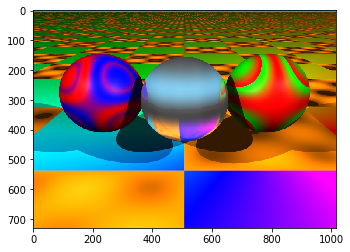

In [63]:
eng.eval('figure; image(bmp); truesize; title(\'bmp\');', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)
img = mpimg.imread('2b_gif_color_bmp.bmp')
plt.imshow(img)
plt.show()

2(d)

Based on their relative appearances, describe how gradual changes in color are implemented (or approximated) by the color mapped image.


#### Answer: Colormapped ("Indexed") images are based on the true color images but binned into a histogram of 256 colors instead of 256^3 possible color combinations in the truecolor image. There is then a lookup table for the color mapping. The noise in the gif seems to stem from cutoffs from adjacent color bins.

2(d)

Like you did in Homework 1, use Matlab ?s native indexing to cut a 64 ï¿½ 64 sub-image out of the original truecolor image. Select a region where there is a smooth change in intensity or color.s

In [174]:
eng.eval('crop = bmp(160:160+64, 300:300+64, :);', nargout=0, stdout=out, stderr=err)

Explain how you did this. Write down the coordinates you chose. Use the Matlab function, imresize, to enlarge the small image to 512 ï¿½ 512. Use the nearest neighbor mode. Display the new image in a figure window. The individual pixels should be clearly, distinctly visible as squares. Use the imwrite(ï¿½) function to save the enlarged image as a .bmp file.

#### Answer: The point I chosed was (160, 300). I chosed it by selecting the middle ball, which is roughly in the center of the image.

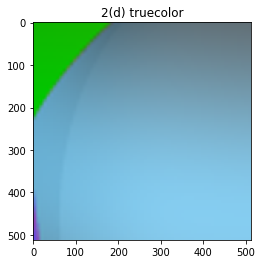

In [175]:
eng.eval('crop_resized_bmp = imresize(crop, [512 512]);', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(crop_resized_bmp); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('imwrite(crop_resized_bmp, \'crop_resized_bmp.bmp\');', nargout=0, stdout=out, stderr=err)
img = mpimg.imread('crop_resized_bmp.bmp')
plt.imshow(img)
plt.title('2(d) truecolor')
plt.show()

Do exactly the same thing with cwheel_mapped.gif using the same image coordinates, so that you get exactly the same regions out of both images. Save the enlarged region as a BMP image with the original color map from cwheel_mapped.gif to include in your report. If the enlarged region of the colormapped image is in array J512, then this will save the image with the colormap as a .bmp file named cwheel_mapped_detail.bmp:

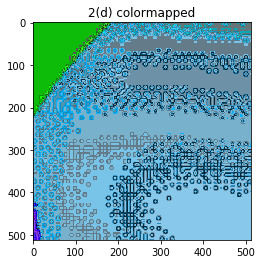

In [177]:
eng.eval('crop = gif(160:160+64, 300:300+64, :);', nargout=0, stdout=out, stderr=err)
eng.eval('crop_resized_gif = imresize(crop, [512 512]);', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(crop_resized_gif); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('colormap(cmap_gif);', nargout=0, stdout=out, stderr=err)
eng.eval('imwrite(crop_resized_gif, cmap_gif, \'crop_resized_gif.bmp\')', nargout=0, stdout=out, stderr=err)
img = mpimg.imread('crop_resized_gif.bmp')
plt.imshow(img)
plt.title('2(d) colormapped')
plt.show()

2(e)

It may appear that the color mapped image is inferior to the truecolor version. That is usually so for images that are color photographs. But if the image is a graphic with no more than the number of colors that can be displayed with an indexed image then the indexed (color mapped) version may be better, depending on the file format in which it is stored.

The following image illustrates another situation in which a color mapping can be useful. Download plume_gs.bmp from Blackboard, read and display it and its color map in Matlab. 

This image of a smoke plume is such that the intensity (grayscale) of the image at a pixel is directly proportional to the density of the smoke at the corresponding location in space. Display the image in two other figure windows so that you have three copies of it.

Apply the the color map you loaded with the image to one of figures. Apply the jet(256) color map to the second figure. 

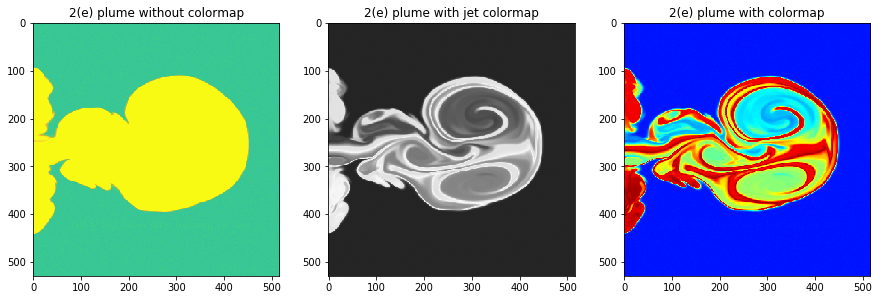

In [189]:
eng.eval('[plume, cmap_plume] = imread(\'plume_gs.bmp\');', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(plume); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(plume); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('colormap(cmap_plume);', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(plume); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('colormap(jet(256));', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
img = mpimg.imread('2e_plume_no_map.bmp')
axes[0].imshow(img)
axes[0].set_title('2(e) plume without colormap')
img = mpimg.imread('2e_plume_map.bmp')
axes[1].imshow(img)
axes[1].set_title('2(e) plume with jet colormap')
img = mpimg.imread('2e_plume_jet_256.bmp')
axes[2].imshow(img)
axes[2].set_title('2(e) plume with colormap')
plt.show()

2(e)
Can you see structures in the plume that were not visible before? If so, describe them. 

#### Answe: Yes. The grayscale colormap shows the inner structures with different intensities, while the jet(256) colormap shows even more distinct structures with different shades of blue, green, and red.


Apply a random color map rand(256,3) to the third figure. Repeat colormap(rand(256,3)) a few times until you get an image with good contrast.

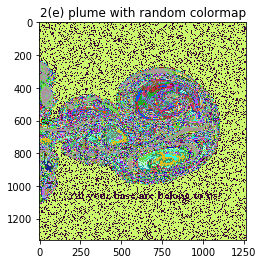

In [197]:
eng.eval('figure; image(plume); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('colormap(rand(256, 3));', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

img = mpimg.imread('2e_plume_words.bmp')
plt.imshow(img)
plt.title('2(e) plume with random colormap')
plt.show()

2(e)

Again, can you see structures that were not before visible?

#### Answer: Yes. The words "all your base are belong to me"

2(e)

Save the smoke plume image with the jet(256) color map and save it with the random color map for inclusion in your report.

3. Arithmetic operations on images and sub-images.

3(a) Acquire a 24-bit image about the same size as cwheel.bmp that has a wide range of intensities (dark to light). Use an image of your choice, but not cwheel.bmp.

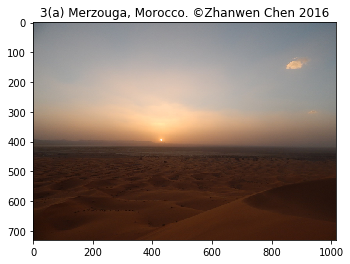

In [165]:
eng.eval('merzouga = imread(\'ZhanwenChenMerzouga.JPG\');', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(merzouga); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)
img = mpimg.imread('3a_merzouga.bmp')
plt.imshow(img)
plt.title('3(a) Merzouga, Morocco. ©Zhanwen Chen 2016')
plt.show()

3(b) Assume matrix J contains your image.

3(b)(i) 

Display J/2

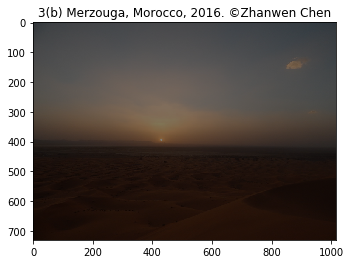

In [73]:
eng.eval('figure; image(merzouga/2); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

img = mpimg.imread('3b_i_merzouga_half.bmp')
plt.imshow(img)
plt.title('3(b)(i)')
plt.show()

3(b)(i)

#### Answer: The halved image is much darker for brighter pixels and a little darker for already dark ones.

3(b)(ii)

Display J*2, 

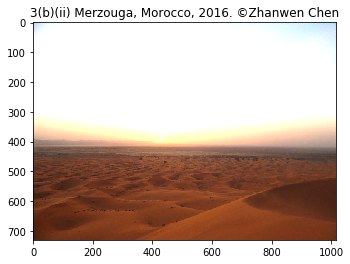

In [75]:
eng.eval('figure; image(merzouga*2); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

img = mpimg.imread('3b_ii_merzouga_double.bmp')
plt.imshow(img)
plt.title('3(b)(ii)')
plt.show()

3(b)(ii)

#### Answer: The doubled image is much brighter for brighter pixels and a little brighter for already bright ones.

3(b)(iii)

Display J-128

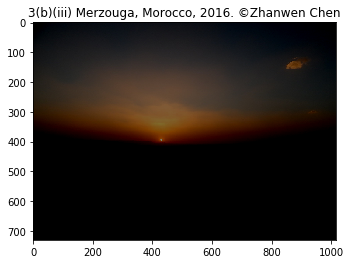

In [77]:
eng.eval('figure; image(merzouga-128); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

img = mpimg.imread('3b_iii_merzouga_minus.bmp')
plt.imshow(img)
plt.title('3(b)(iii)')
plt.show()

3(b)(iii)

#### Answer: The minus image is evenly darker for all pixels.

3(b)(iv)

Display J+128

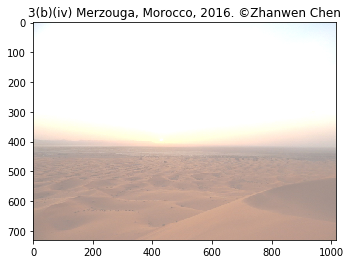

In [79]:
eng.eval('figure; image(merzouga+128); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

img = mpimg.imread('3b_iv_merzouga_plus.bmp')
plt.imshow(img)
plt.title('3(b)(iv)')
plt.show()

3(b)(iii)

#### Answer: The minus image is evenly brighter for all pixels.

3(b)


What happens when the image is of class uint8, and the result of arithmetic on a pixel would yield a negative value? What happens when the result is greater than 255?


#### Answer: Because of the uint8 class, negative values are truncated to 0 and all values greater than 255 are truncated to 255.

3(c)

If your image has different dimensions from cwheel.bmp, cut out pieces of one or both images (using native Matlab indexing) so that sthey are both have exaactly the same dimensions.

Now read cwheel.bmp into variable S in Matlab. 

In [81]:
eng.eval('S = imread(\'cwheel.bmp\');', nargout=0, stdout=out, stderr=err)

3(c)

Form and display the sum, J+S, and the product,J.* S.

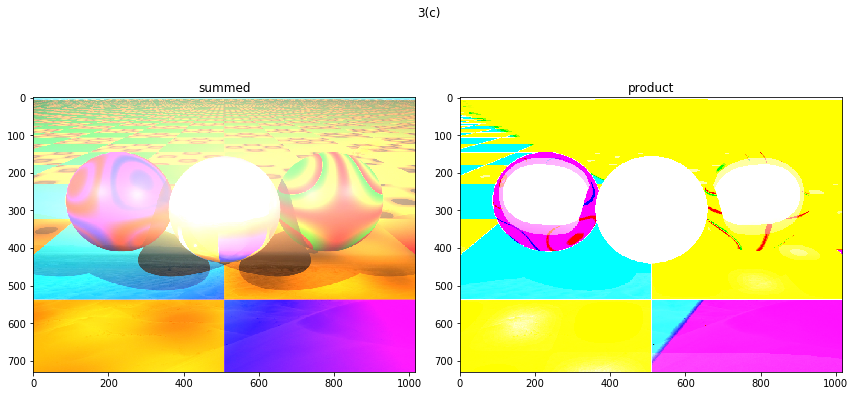

In [97]:
eng.eval('summed = merzouga+S;', nargout=0, stdout=out, stderr=err)
eng.eval('product = merzouga.*S;', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(summed); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)
eng.eval('figure; image(product); truesize;', nargout=0, stdout=out, stderr=err)
eng.eval('set(gca,\'position\',[0 0 1 1],\'units\',\'normalized\', \'Visible\', \'off\');', nargout=0, stdout=out, stderr=err)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('3(c)')

img = mpimg.imread('3c_merzouga_plus_s.bmp')
axes[0].imshow(img)
axes[0].set_title('summed')

img = mpimg.imread('3c_merzouga_times_s.bmp')
axes[1].imshow(img)
axes[1].set_title('product')

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

3(c)

Describe the results.

#### Answer: The sum image retains mostly the color profile of the cwheel image. However, there are white spots where the user-provided image ('merzouga') is most bright. As for the product image, it became a unary image where all pixel values seem to be exactly 255, resulting in only four colors: cyan, magenta, yellow, and white.

3(c)

What is the maximum possible value of a sum of two images? 

In [102]:
clean_buffers(out, err)
eng.eval('sum_double = double(merzouga) + double(S); fprintf(\'3(c) max(sum_double(:)) = %d\\n\', max(sum_double(:)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

3(c) max(sum_double(:)) = 510


How might you adjust the sum so that the maximum fits in an 8-bit image?

#### Answer: convert it to double, divide by its max (510), and convert back to uint8.

What is the maximum possible value of a product of two images? 

In [104]:
clean_buffers(out, err)
eng.eval('product_double = double(merzouga).* double(S); fprintf(\'3(c) max(product_double(:)) = %d\\n\', max(product_double(:)));', nargout=0, stdout=out, stderr=err)
sys.stdout.write(out.getvalue())

3(c) max(product_double(:)) = 65025


How might you adjust the product so that the maximum fits in an 8-bit image?

#### Answer: convert it to double, divide by its max (65025), and convert back to uint8.

4. Looping in Matlab

If you are not familiar with Matlab functions, then please read the help pages for “function,” in
“MATLAB > Programming Scripts and Functions > Functions > Function Basics.”

Matlab provides a way to time the execution of its code, the pair of functions, tic and toc. They are placed in a function before and after the code to be timed. For example

J = DivIbyConstLoops(I,c)
    tic
    % code to time goes here
    toc
end


(a) Write a function that divides every pixel in the image by a constant c using loops. That is use for statements to make 3 nested loops. For example, have the the first loop index the bands. Inside that loop index across the columns. And inside that, loop down the rows. Any permutation of the order is OK but there need to be three loops. Note that in the function before the loops you will need to use the size function to get the dimensions of the image.

Place tic on a line before the first for statement. Place toc on a line after all three loops (the last of 3 end statements). Load an image and run the function on it. Note the elapsed time.


#### Matlab function:
```matlab
function divved = DivIbyConstLoops(image, constant)
    tic
    [nrows, ncols, nbands] = size(image);
    for r = 1:nrows
        for c = 1:ncols
            for b = 1:nbands
                image(r, c, b) = uint8(double(image(r, c, b))/constant);
            end
        end
    end
    toc
    divved = image;
end
```

4(b)

Write a function that divides every pixel in the image by a constant c without using loops. This is particularly simple,

#### Matlab function:
```matlab
function J = DivIbyConstNoLoops(I,c)
    tic
    J=uint8(double(I)/c);
    toc
end
```
(Note the type conversions.) Load an image and run the function on it. Note the elapsed time.

In [111]:
clean_buffers(out, err)
eng.eval('merz_divided_loop = DivIbyConstLoops(merzouga, 2); % loop version took 0.043690 seconds.', nargout=0, stdout=out, stderr=err)
sys.stdout.write('4(b) loop version: ' + out.getvalue())

clean_buffers(out, err)
eng.eval('merz_divided_matmul = DivIbyConstNoLoops(merzouga, 2); % loop version took 0.001388 seconds.', nargout=0, stdout=out, stderr=err)
sys.stdout.write('4(b) vectorized version: ' + out.getvalue())

4(b) loop version: Elapsed time is 0.767492 seconds.
4(b) vectorized version: Elapsed time is 0.001071 seconds.


4(b) 

What do the 2 times tell you about using loops in matlab?

#### Answer:  Matlab is optimized for vectorized operations between a matrix and a scalar.


5(a)(i) 

Write a function that outputs an image J made from input image I such that J(r,c,b) is the average of I(r,c,b) and the 8 pixels that surround it. Use three nested loops, over the bands, the rows, and the columns.

In the function, record the size of I in the three scalars R, C, and B.  Convert I to double. Allocate J as a zero image the same size as I. Loop over all B bands. So as not to go outside of I when constructing J, loop the rows from 2 to R-1 and the columns from 2 to C-1. That means the resulting J will have a 1-pixel wide band of zeros around it. Convert J to uint8.

Surround outside loop with tic and toc so that when you run the function it tells you the amount of time it took to execute the loops.


Load a truecolor image of your choice into Matlab . Run your function on it, note the time and display the image. Include your code, the size of the image, and the execution time in your report. You need not include the input image nor the output image.


#### Matlab function: loop version:
```matlab
function average_image = getAverageImage_loop(original_image)
    % Convert to double
    original_image_float = double(original_image);
    % Get sizes
    [num_rows, num_cols, num_bands] = size(original_image_float);
    % Allocate a zeros image
    average_image = zeros(num_rows, num_cols, num_bands);

    % Do the same thing on each band.
    tic
    for band = 1:num_bands
        % for all points in 2D, average 9-blocks. No edge cases.
        for row = 2:num_rows-1
           for col = 2:num_cols-1
                average_image(row, col, band) = (original_image_float(row-1, col-1, band) ...
                                                + original_image_float(row-1, col, band) ...
                                                + original_image_float(row-1, col+1, band) ...
                                                + original_image_float(row, col-1, band) ...
                                                + original_image_float(row, col, band) ...
                                                + original_image_float(row, col+1, band) ...
                                                + original_image_float(row+1, col-1, band) ...
                                                + original_image_float(row+1, col, band) ...
                                                + original_image_float(row+1, col+1, band)) / 9.0;
           end
        end
    end
    toc
    average_image = uint8(average_image);
end
```


#### Matlab function: vectorized version:
```matlab
function average_image = getAverageImage_vec(I)
    % Convert to double
    I = double(I);
    
    % Get sizes
    [R, C, B] = size(I);
    
    average_image = zeros(R, C, B);
    tic
    average_image = (I + ... % original
                    [zeros(1,C,B); I(1:R-1,:,:)] + ... % down
                    [I(2:R,:,:); zeros(1,C,B)] + ... % up
                    [zeros(R,1,B) I(:,1:C-1,:)] + ... % right
                    [I(:,2:C,:) zeros(R,1,B)] + ... % left
                    [zeros(R, 1, B) [zeros(1,C-1,B); I(1:R-1,1:C-1,:)]] + ... % down_right
                    [[zeros(1,C-1,B); I(1:R-1,2:C,:)] zeros(R, 1, B)] + ... % down_left
                    [zeros(R, 1, B) [I(2:R,1:C-1,:); zeros(1,C-1,B)]] + ... % up_right
                    [[I(2:R,2:C,:); zeros(1,C-1,B)] zeros(R, 1, B)]) / 9.0; % up_left
                    average_image([1, R], :, :) = 0;
                    average_image(:, [1, C], :) = 0;
    toc
    average_image = uint8(average_image);
end
```

Repeat the two methods serveral times to get a typical execution time. Were the results what you expected? Explain why the results might be so

#### Answer: On average, the loop implementation took 0.021786 seconds, while the vectoized one took 0.083131 seconds. These results surprised me, because 

In [113]:
clean_buffers(out, err)
eng.eval("loop = getAverageImage_loop(I);", nargout=0, stdout=out, stderr=err)
sys.stdout.write("5(a)(i) loop version: " + out.getvalue())

clean_buffers(out, err)
eng.eval("vec = getAverageImage_vec(I);", nargout=0, stdout=out, stderr=err)
sys.stdout.write("5(a)(ii) vectorized version: " + out.getvalue())

5(a)(i) loop version: Elapsed time is 0.022869 seconds.
5(a)(ii) vectorized version: Elapsed time is 0.104358 seconds.


5(b) 

Write two functions that accept an M x N matrix and output as L2 distance matrix. Assume that the input matrix contains N M-vectos (each column is a vector). The distance matrix will be N x N. Element (i, j) contains the L2 (a.k.a. Euclidean) distance between the ith and jth vectors in the input matrix.

The first program should be written using loops. Note that there are symmetries in the resultant matrix that can be exploited to reduce execution time.

#### Matlab function: loop version:

```matlab
function D2 = getL2Dist_loop(A)
    tic
    n = size(A, 2);
    D2 = zeros(n, n);
    for r = 1:n
        for c = (r+1):n
            diff = A(:,r)-A(:,c);
            D2(r,c) = sqrt(diff'*diff);
            if r == 1000 && c == 11
                fprintf('(1000, 11): diff = %s, D2(1000, 11) = %f', mat2str(diff), D2(r,c));
            end
        end
    end
    D2 = D2 + D2';
    toc
end
```

The second program should use no loops. That can be accomplished using bsxfun, but there may be other ways. Consider computing the distance matrix using the expansion of the L2 distance into an expression in terms of L2 inner products. I.e., ||xi  x|j|| = '??'

#### Matlab function: vectorized version:

```matlab
function D2 = getL2Dist_vec(A)
    tic
    D2 = sqrt(bsxfun(@plus,sum(A.^2)',bsxfun(@plus,sum(A.^2),-2*(A'*A))));
    toc
end
```

Compare the execution times of the two on a random 10 x 1000 matrix using tic and toc. Compare thos results to that of the Matlab built-in pdist() from the statistics toolbox. Repeat all three several times to get a typical time. Were the results what you expected? Explain why the results might be so.

#### Answer: looped version takes 0.063182 seconds. vectorized 0.005860 seconds, and pdist 0.013539 seconds.

In [117]:
eng.eval('rando = randi([0, 255], 10, 1000);', nargout=0, stdout=out, stderr=err)

clean_buffers(out, err)
eng.eval('D_loop = getL2Dist_loop(rando);', nargout=0, stdout=out, stderr=err)
sys.stdout.write('5(b) loop version: ' + out.getvalue())

clean_buffers(out, err)
eng.eval('D_vec = getL2Dist_vec(rando);', nargout=0, stdout=out, stderr=err)
sys.stdout.write('5(b) vectorized version: ' + out.getvalue())

clean_buffers(out, err)
eng.eval('tic; D_pdist = squareform(pdist(rando\')); toc', nargout=0, stdout=out, stderr=err)
sys.stdout.write('5(b) pdist version: ' + out.getvalue())

5(b) loop version: Elapsed time is 0.076565 seconds.
5(b) vectorized version: Elapsed time is 0.010103 seconds.
5(b) pdist version: Elapsed time is 0.019516 seconds.
